In [25]:
!pip install emoji

  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171032 sha256=4e2a11b8c1375c03deab161cf59653f0f2d1f6c09c40f9539916824b84abf225
  Stored in directory: c:\users\sabim\appdata\local\pip\cache\wheels\5e\8c\80\c3646df8201ba6f5070297fe3779a4b70265d0bfd961c15302
Successfully built emoji


In [2]:
pip list

Package                            Version
---------------------------------- -------------------
absl-py                            0.14.1
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 1.9.12
anaconda-project                   0.8.3
argh                               0.26.2
asn1crypto                         1.3.0
astroid                            2.4.2
astropy                            4.0.1.post1
astunparse                         1.6.3
asyncio                            3.4.3
atomicwrites                       1.4.0
attrs                              19.3.0
Augmentor                          0.2.9
autopep8                           1.5.3
Babel                              2.8.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.1
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
bcrypt                      

QDarkStyle                         2.8.1
QtAwesome                          0.7.2
qtconsole                          4.7.5
QtPy                               1.9.0
regex                              2020.6.8
requests                           2.25.1
requests-oauthlib                  1.3.0
rope                               0.17.0
rsa                                4.7.2
Rtree                              0.9.4
ruamel-yaml                        0.15.87
scikit-image                       0.16.2
scikit-learn                       0.23.1
scipy                              1.5.0
seaborn                            0.10.1
selenium                           3.141.0
Send2Trash                         1.5.0
setuptools                         49.2.0.post20200714
simplegeneric                      0.8.1
singledispatch                     3.4.0.3
sip                                4.19.13
six                                1.15.0
smart-open                         5.2.1
snowballstemmer           

In [9]:
# For dataframes
import pandas as pd 

# For numerical arrays
import numpy as np 

# For stemming/Lemmatisation/POS tagging
import spacy

# For getting stopwords
from spacy.lang.en.stop_words import STOP_WORDS

# For K-Fold cross validation
from sklearn.model_selection import KFold

# For visualizations
import matplotlib.pyplot as plt

# For regular expressions
import re

# For handling string
import string

# For all torch-supported actions
import torch

# For spell-check
# from spellchecker import SpellChecker

# For performing mathematical operations
import math

# For dictionary related activites
from collections import defaultdict

# For counting actions (EDA)
from collections import  Counter

# For count vectorisation (EDA)
from sklearn.feature_extraction.text import CountVectorizer

# For one-hot encoding
from tensorflow.keras.utils import to_categorical


In [13]:
# For DL model
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, LSTM
from tensorflow.keras.models import Model, Sequential

# For generating random integers
from random import randint

#For making wordclouds
from wordcloud import WordCloud 

# For TF-IDF vectorisation
from sklearn.feature_extraction.text import TfidfVectorizer

# For padding
from tensorflow.keras.preprocessing.sequence import pad_sequences

# For tokenization
from tensorflow.keras.preprocessing.text import Tokenizer

# For plotting
import seaborn as sns

print("Necessary libraries imported")

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


Necessary libraries imported


In [15]:
# Read train.csv file

df=pd.read_csv('train.csv')
df.head(10)

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
5,00004f9a462a357c33be,"Is Gaza slowly becoming Auschwitz, Dachau or T...",0
6,00005059a06ee19e11ad,Why does Quora automatically ban conservative ...,0
7,0000559f875832745e2e,Is it crazy if I wash or wipe my groceries off...,0
8,00005bd3426b2d0c8305,"Is there such a thing as dressing moderately, ...",0
9,00006e6928c5df60eacb,Is it just me or have you ever been in this ph...,0


Aim: Time to do some EDA baby!
This phase involves complete understanding of what is there in the dataset, and the key nuances that needs to be understood before framing the Input-Output ML pipeline. We perform the following:

Dataset description (to know what's presented and what's not available)
1.1 Dataset Description
Studying the basic statistics of the dataset, which covers the following aspects:

Analysing columns
Null-Value statistics
Overall column-wise stats
Highest and lowest word length, input length
Target types and frequency

In [16]:
print('Total rows in dataset: ',len(df),'Rows\n')
print('Dataset columns: ')
print(df.columns)
print('\nNull Statistics (in %): ')
print(df.isnull().sum()* 100 / len(df))
print('\nDataset description: ')
print(df.describe())
print('\nEssay prompt frequency: ')
print(df.groupby("target").describe().loc[:,[('question_text',  'count'),('question_text', 'unique')]])

Total rows in dataset:  1306122 Rows

Dataset columns: 
Index(['qid', 'question_text', 'target'], dtype='object')

Null Statistics (in %): 
qid              0.0
question_text    0.0
target           0.0
dtype: float64

Dataset description: 
             target
count  1.306122e+06
mean   6.187018e-02
std    2.409197e-01
min    0.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    0.000000e+00
max    1.000000e+00

Essay prompt frequency: 
       question_text         
               count   unique
target                       
0            1225312  1225312
1              80810    80810



Max and Min statistics for word/char count of question_text: 
MAX	 1017 characters, 134 words
MIN	 1 character(s), 1 word(s)
Pie plot against Target


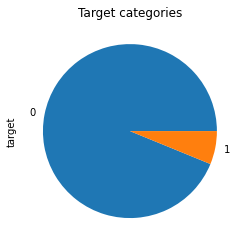

In [17]:
print('\nMax and Min statistics for word/char count of question_text: ')
print('MAX\t',max(df.question_text.apply(lambda x: len(x))),'characters,',
     max(df.question_text.apply(lambda x: len(x.split()))), 'words')
print('MIN\t',min(df.question_text.apply(lambda x: len(x))),'character(s),',
     min(df.question_text.apply(lambda x: len(x.split()))), 'word(s)')

print('Pie plot against Target')
df.target.value_counts().plot(title='Target categories',kind='pie')

Inference:

1. There are 1306122 rows, all of which are non-null and unique (Thats a lot!)
2. We only have 3 columns: one column is the Q-ID (won't contribute to decision making), the other column is the Question Text (the main input), and the last column is the Target (the expected output)
3. The data is highly biased, with 1225k sincere questions target=0 and only 80k insincere questions target=1 (Which means we've got to be careful while training our models cuz the dataset itself is partial towards sincerity)
4. There can be 100+ words or 1000+ characters in a question_text (ie, our model should be scalable enough to handle bigger sentences)

 Effect of essay-word-lengths over score
 - Here, we observe the trend of distribution of targets across different essay sets, capturing the following trends:

1. Total words vs target
2. Word length vs target

ScatterPlot for Target vs average word length


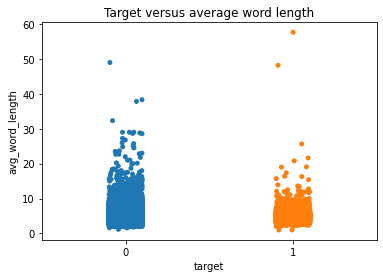

In [18]:
def get_avg_length(essay):
    summ=0
    for word in essay.split():
        summ+=len(word)
    return round(summ/len(essay.split()),2)

df['avg_word_length']=df.question_text.apply(lambda x: get_avg_length(x))
print("ScatterPlot for Target vs average word length")
plt.plot(figsize=(10,10)) 
plt.title('Target versus average word length')

sns.stripplot(data=df,
    x="target", y="avg_word_length")

plt.show()

Boxplot for Target vs total words


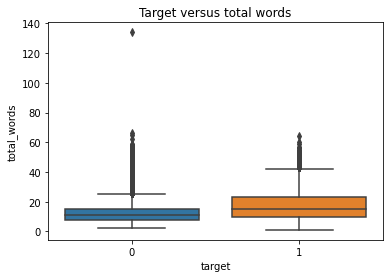

In [19]:
df['total_words']=df.question_text.apply(lambda x: len(x.split()))
print("Boxplot for Target vs total words")
plt.plot(figsize=(8,15)) 
plt.title('Target versus total words')

sns.boxplot(data=df,
    x="target", y="total_words")
plt.show()

Inference:

- The average wordlength for both the categories is scattered around the 5-15 mark, but there are a few outliers whose average wordlength crosses 60.
- (we have noise in our data: we can expect sentences that aren't grammatically/syntactically/spellingly correct.)
- Although the maximum of total words used could cross 100, majority of the questions are based around the 0-50 region, with exceptions of outliers.
- (We're gonna have to use a dataset which has majority of sentences within a respectable range, and a minority of sentences that could pose a problem due to unusually high number of words.)

Unigram analysis¶
- The primary goal here is to see what words are most frequently used. This will be done in the following ways:

- - Frequency of stop-words used
- - Most commonly occuring non-stop-words in each target category

Stop-word freuqency


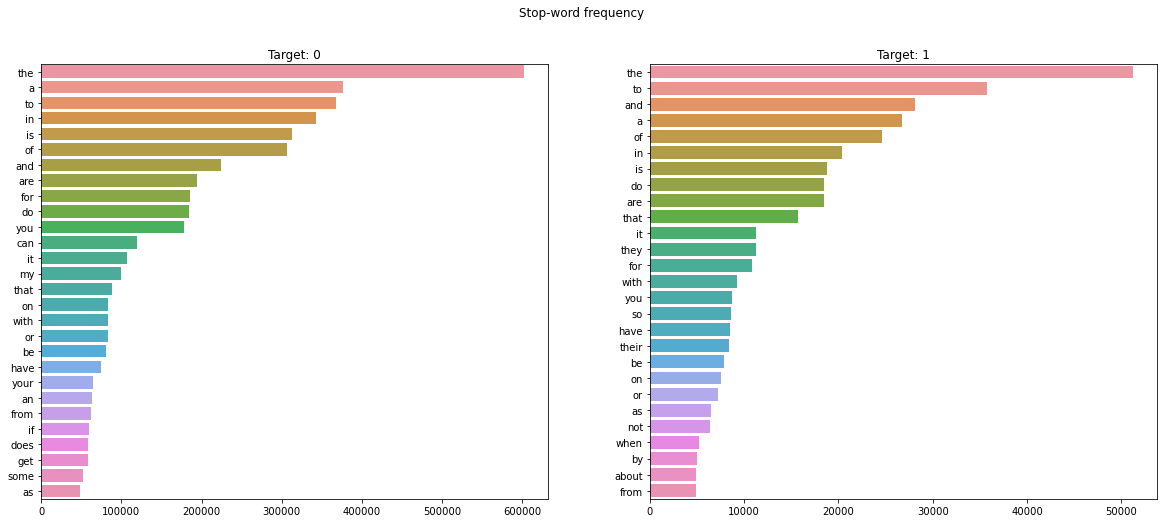

In [20]:
print("Stop-word freuqency")

fig, axes = plt.subplots(1,len(df.target.unique()), figsize=(20,8))
fig.suptitle('Stop-word frequency')

for index,target in enumerate(df.target.unique()):
    dct=defaultdict(int) 
    curdf=df[df['target']==target]  
    
    allwordsarr=curdf.question_text.str.cat().split() #First, we join all strings from the question_text column,
    # then we split em all so that we get an array of all words, which could be counted
    counter=Counter(allwordsarr)
    most=counter.most_common()
    x=[]
    y=[]
    for word,count in most[:30]:
        if (word in STOP_WORDS) :
            x.append(word)
            y.append(count)
    sns.barplot(ax=axes[index],x=y,y=x)
    axes[index].set_title("Target: "+str(target))

Wordcloud


Text(0.5, 0.98, 'Wordcloud')

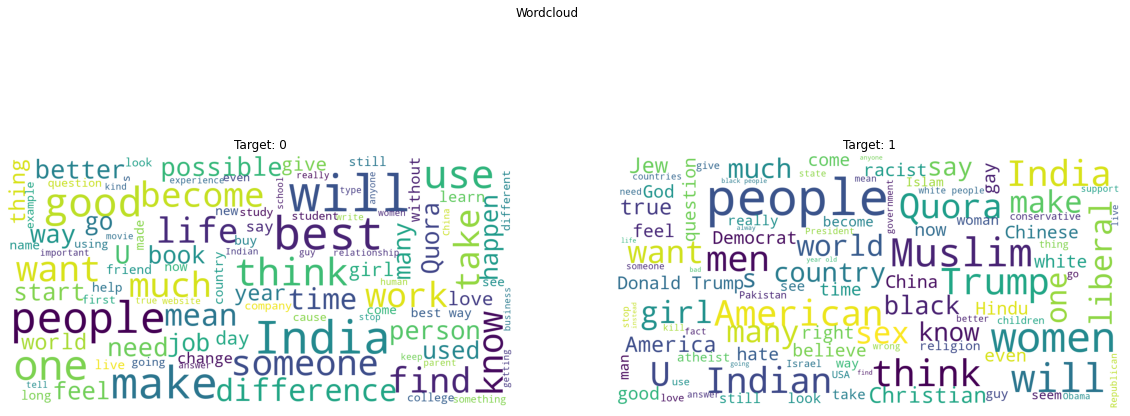

In [21]:
print("Wordcloud")

fig, axes = plt.subplots(1,len(df.target.unique()), figsize=(20,8))

    
for index,target in enumerate(df.target.unique()):
    dct=defaultdict(int) 
    curdf=df[df['target']==target]  
    
    df_fullstring=" ".join(curdf.question_text.str.cat().split()) #first, we join all strings of column,
                                    # then split by space, then join again because we want a full string here
    wordcloud = WordCloud(background_color='white',max_words=100,
                      max_font_size=40,
                      scale=3,
                      random_state=1).generate(df_fullstring)

    axes[index].imshow(wordcloud)
    axes[index].set_title('Target: '+str(target))
    axes[index].axis('off')
    
fig.suptitle('Wordcloud')

Most commonly occcuring words in all categories


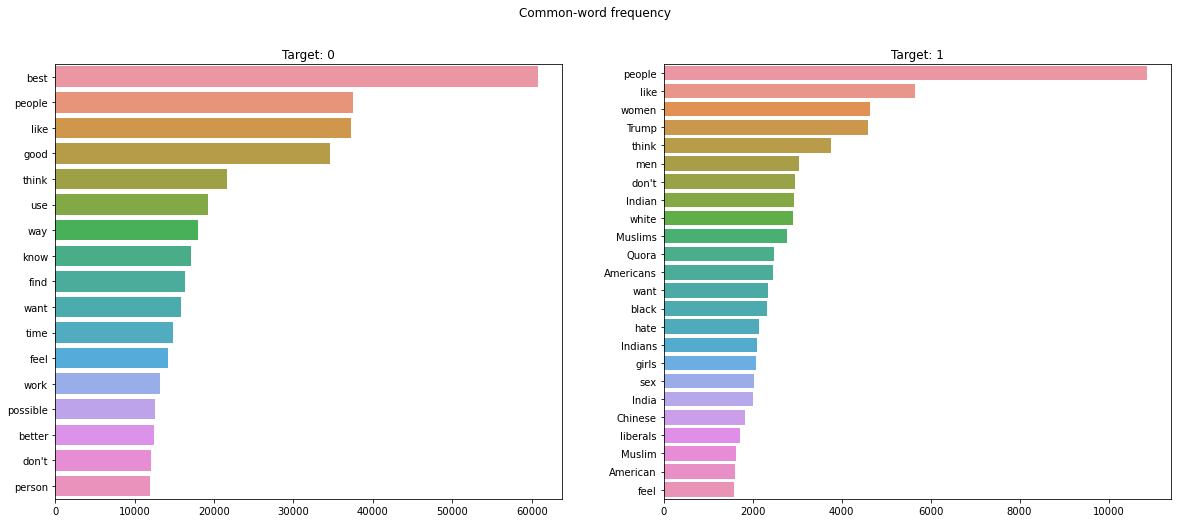

In [22]:
print("Most commonly occcuring words in all categories")

fig, axes = plt.subplots(1,len(df.target.unique()), figsize=(20,8))
fig.suptitle('Common-word frequency')

for index,target in enumerate(df.target.unique()):
    dct=defaultdict(int) 
    curdf=df[df['target']==target]  
    allwordsarr=curdf.question_text.str.cat().split()
    counter=Counter(allwordsarr)
    most=counter.most_common()
    x=[]
    y=[]
    for word,count in most[:100]:
        if (word.lower() not in STOP_WORDS):
            x.append(word)
            y.append(count)
    sns.barplot(ax=axes[index],x=y,y=x)
    axes[index].set_title("Target: "+str(target))

Inference

- We get the following information from these two series of barcharts:

- The frequency of stop-words in each word is heavy enough (raising the need to do stopword-removal during data cleaning and feature-formatting)
- There seems to be no explainable reason to have a word heavily associated with a category. For instance, the popular word "India" appears in both sides

Bigram analysis
- The primary goal here is to analyse the trend of bigrams used in each category

Bigram analysis


<ipython-input-23-fd4e1034613a>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


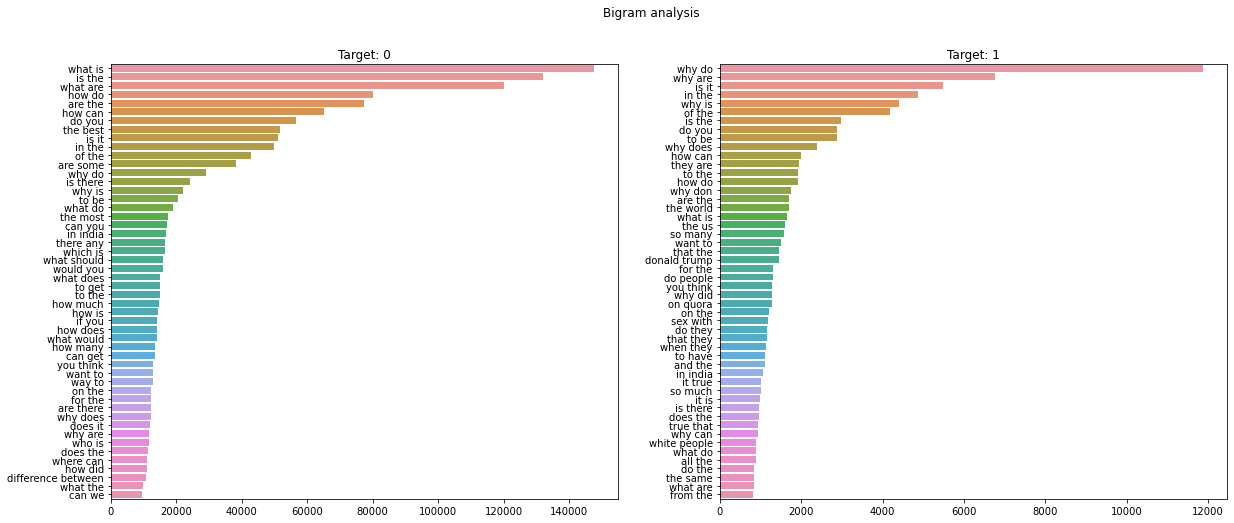

In [23]:
def get_top_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

print("Bigram analysis")

fig, axes = plt.subplots(1,len(df.target.unique()), figsize=(20,8))
fig.suptitle('Bigram analysis')

for index,target in enumerate(df.target.unique()):
    dct=defaultdict(int) 
    top_bigrams=get_top_bigrams(df[df['target']==target].question_text)[:50]
    x,y=map(list,zip(*top_bigrams))
    sns.barplot(ax=axes[index],x=y,y=x)
    axes[index].set_title("Target: "+str(target))

fig.show()

Inference

- The data is highly populated with stop words, almost all of the top occurences have stop-words in them
- Its surprising to see a good amount of region-specific, religion-specific and community-specific words. For instance, the word "Donald Trump" is very popular in target=1 class (ie, there is geographical bias; and we have to ensure that the model we make WILL NOT blindly imbibe this trait)

Other stuff
Here, we analyse the following

- Presence of HTML tags
- Presence of URLs
- Presence of emojis
- Capitalisation
- Punctuation-statistics

C:\Users\sabim\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


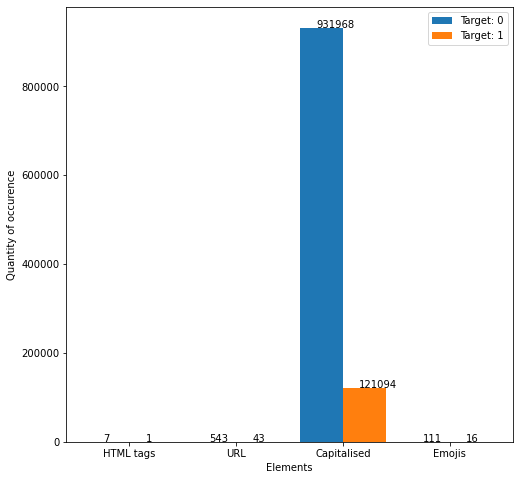

In [26]:
from emoji import UNICODE_EMOJI

def count_emojis(s):
    count = 0
    for emoji in UNICODE_EMOJI['en']:
        count += s.count(emoji)
    return count

allvalues=[]
plt.figure(figsize=(8,8))
for index,target in enumerate(df.target.unique()):
    cur_dict=dict()
    curdf=df[df['target']==target]  
    
    curdf.question_text=curdf.question_text.apply(lambda x: str(x))
    df_caps=" ".join(curdf.question_text.str.cat().split())
    curdf.question_text=curdf.question_text.apply(lambda x: x.lower())
    df_fullstring=curdf.question_text.str.cat()
    cur_dict['HTML tags']=len(re.findall("<.*>",df_fullstring))
    cur_dict['URL']=len(re.findall("http",df_fullstring))
    cur_dict['Capitalised']=len(re.findall("[^\.!\?]\s[A-Z]\w+[\W\?:\.!-_]",df_caps))
    cur_dict['Emojis']=count_emojis(df_caps)
    
    x_keys = list(cur_dict.keys())
    y_values = list(cur_dict.values())
    x_axis = np.arange(len(x_keys))
    bars=plt.bar(x_axis - 0.2+0.4*index, y_values,0.4, label = 'Target: '+str(target))
    allvalues+=y_values
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x()+0.15, yval+5, yval)


    
plt.xticks(x_axis, x_keys)
plt.xlabel("Elements")
plt.ylabel("Quantity of occurence")
plt.legend()
plt.show()

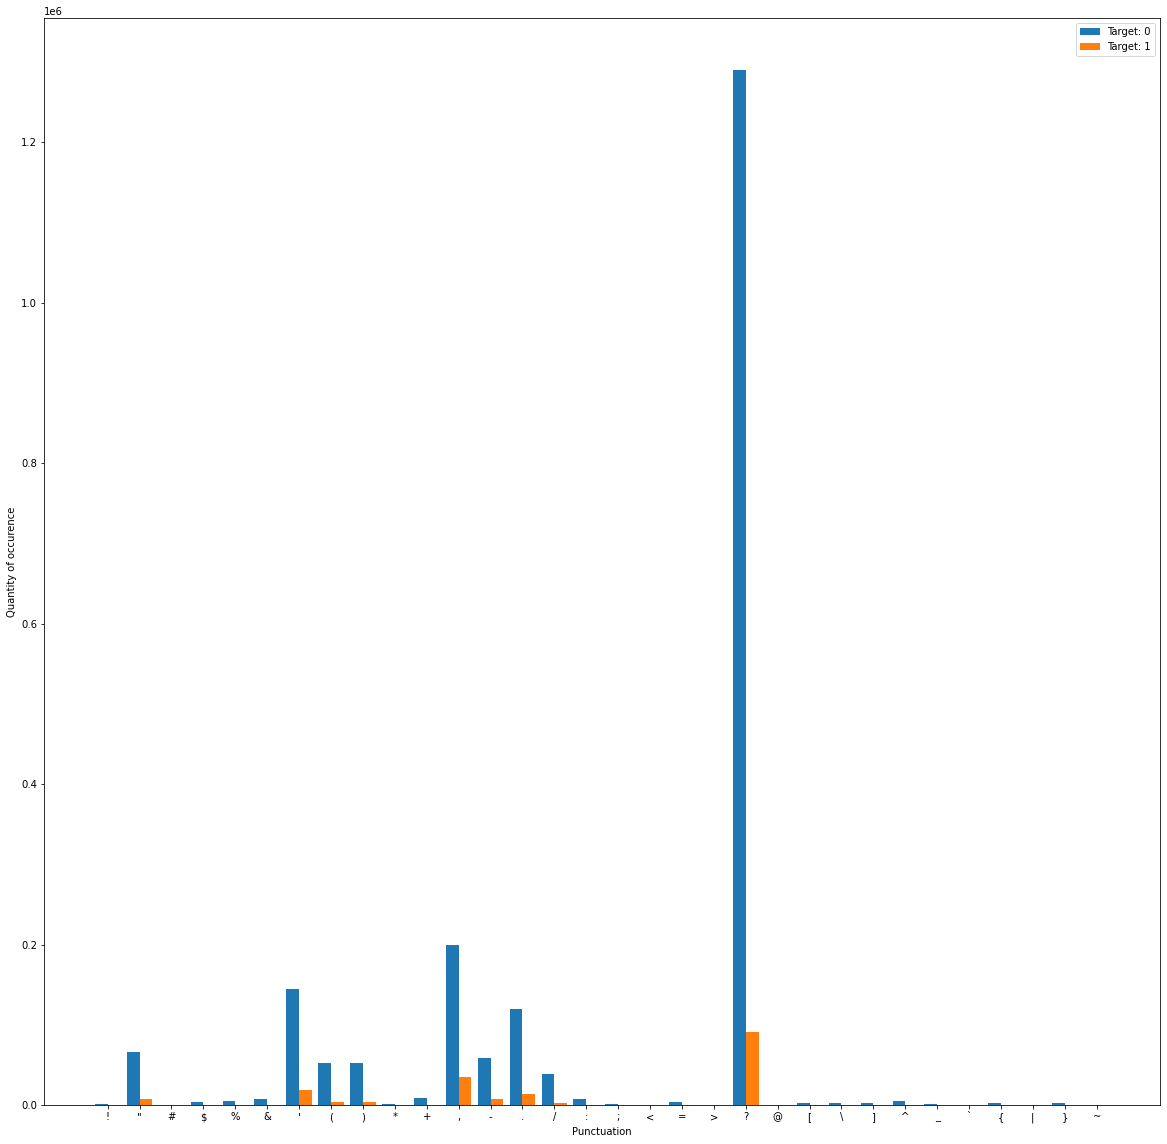

In [27]:
def count_punctuations(s):
    arr=list()
    for punct in string.punctuation:
        count = s.count(punct)
        arr.append(count)
    return arr

allvalues=[]
plt.figure(figsize=(20,20))
for index,target in enumerate(df.target.unique()):
    cur_dict=dict()
    curdf=df[df['target']==target]  
    
    curdf.question_text=curdf.question_text.apply(lambda x: str(x))
    df_fullstring=curdf.question_text.str.cat()
    
    x_keys = string.punctuation
    y_values = count_punctuations(df_fullstring)
    x_axis = np.arange(len(x_keys))
    bars=plt.bar(x_axis - 0.2+0.4*index, y_values,0.4, label = 'Target: '+str(target))
    


    
plt.xticks(x_axis, x_keys)
plt.xlabel("Punctuation")
plt.ylabel("Quantity of occurence")
plt.legend()
plt.show()

Inference

- HTML tags and HTTP URLs do occur in our dataset (ignoring them might result in loss of significant data, hence we need to find out a way to treat them)
- There are A LOT of capitalised words, indicating the fact that there could be a huge number of proper nouns in the dataset (Proper nouns like names of people, cities, etc are unseen entities with respect to pre-trained transformers like BERT. We may or may not lose information by lowercasing them)
- There are emojis in the dataset, but almost all of them are either of the following: ©, ™, ® (hence, we don't need to care about cleaning emoticons)
- Punctuations.... there's a huge load of punctuations. Its not at all surprising to see the Question mark symbol top the charts, because after all... Quora is for Questions!

#### EDA: the conclusion
We gained the following knowledge by doing Exploratory Data Knowledge:

- There are no null rows, and no duplicate rows
- Oh boy, We have hell-a-lot of data imbalance! (~93% of target=0 and ~7% of target=1)
- There's bias, ie, we can see community specific and location specific terms skewed towards a category
- Both unigram and bigram analysis shows the abundance of Stop Words (Spoiler alert: we're not doing anything to treat it😉)
- We are unable to draw a clear relation between question length, average word length and target class (they come in all shapes and sizes 🏈⚽)
- We have a few HTML tags, and a few HTTP URLs
- We only have ©orporate emoticons™ in our dataset®
- The dataset is enriched with punctuations, keeping them could hopefully contribute to the knowledge mining process❕‼

## BERT Implementation

In [8]:
import pandas as pd
import os
import numpy as np
import pandas as pd
import zipfile
from matplotlib import pyplot as plt
%matplotlib inline
import sys
import datetime

In [3]:
repo = 'model_repo'
with zipfile.ZipFile("uncased_L-12_H-768_A-12.zip","r") as zip_ref:
    zip_ref.extractall(repo)

In [4]:
!ls 'model_repo/uncased_L-12_H-768_A-12'

bert_config.json
bert_model.ckpt.data-00000-of-00001
bert_model.ckpt.index
bert_model.ckpt.meta
vocab.txt


In [5]:
# Available pretrained model checkpoints:
#   uncased_L-12_H-768_A-12: uncased BERT base model
#   uncased_L-24_H-1024_A-16: uncased BERT large model
#   cased_L-12_H-768_A-12: cased BERT large model
#We will use the most basic of all of them
BERT_MODEL = 'uncased_L-12_H-768_A-12'
BERT_PRETRAINED_DIR = f'{repo}/uncased_L-12_H-768_A-12'
OUTPUT_DIR = f'{repo}/outputs'
print(f'***** Model output directory: {OUTPUT_DIR} *****')
print(f'***** BERT pretrained directory: {BERT_PRETRAINED_DIR} *****')

***** Model output directory: model_repo/outputs *****
***** BERT pretrained directory: model_repo/uncased_L-12_H-768_A-12 *****


In [6]:
from sklearn.model_selection import train_test_split

train_df =  pd.read_csv('train.csv')
train_df = train_df.sample(2000)

train, test = train_test_split(train_df, test_size = 0.1, random_state=42)

train_lines, train_labels = train.question_text.values, train.target.values
test_lines, test_labels = test.question_text.values, test.target.values

In [16]:
import modeling
import optimization
import run_classifier
import tokenization
import tensorflow as tf


def create_examples(lines, set_type, labels=None):
#Generate data for the BERT model
    guid = f'{set_type}'
    examples = []
    if guid == 'train':
        for line, label in zip(lines, labels):
            text_a = line
            label = str(label)
            examples.append(
              run_classifier.InputExample(guid=guid, text_a=text_a, text_b=None, label=label))
    else:
        for line in lines:
            text_a = line
            label = '0'
            examples.append(
              run_classifier.InputExample(guid=guid, text_a=text_a, text_b=None, label=label))
    return examples

# Model Hyper Parameters
TRAIN_BATCH_SIZE = 32
EVAL_BATCH_SIZE = 8
LEARNING_RATE = 2e-5
NUM_TRAIN_EPOCHS = 3.0
WARMUP_PROPORTION = 0.1
MAX_SEQ_LENGTH = 128
# Model configs
SAVE_CHECKPOINTS_STEPS = 1000 #if you wish to finetune a model on a larger dataset, use larger interval
# each checpoint weights about 1,5gb
ITERATIONS_PER_LOOP = 1000
NUM_TPU_CORES = 8
VOCAB_FILE = os.path.join(BERT_PRETRAINED_DIR, 'vocab.txt')
CONFIG_FILE = os.path.join(BERT_PRETRAINED_DIR, 'bert_config.json')
INIT_CHECKPOINT = os.path.join(BERT_PRETRAINED_DIR, 'bert_model.ckpt')
DO_LOWER_CASE = BERT_MODEL.startswith('uncased')

label_list = ['0', '1']
tokenizer = tokenization.FullTokenizer(vocab_file=VOCAB_FILE, do_lower_case=DO_LOWER_CASE)
train_examples = create_examples(train_lines, 'train', labels=train_labels)


AttributeError: module 'tensorflow' has no attribute 'gfile'